# Uncovering the Language of Mental Health Issues

Group4: Aarushi Sharma, Yao Li, Yu-Chen Lin, Yu Zheng




Suicide is a significant public health concern and a leading cause of death worldwide, with an estimated 800,000 deaths by suicide every year. We would like to build a model to predict whether the author of the post is at a risk of suicide .


The steps involved in this process are -

1.Data Preprocessing

2.Feature Generation

3.Machine Learning

4.Evaluation 

## Data Preprocessing

### Importing Necessary Packages

In [1]:
#import all the packages that will be used in this lab
import matplotlib.pyplot as plt
import re
import os
import pandas as pd
import numpy as np

#processing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

#ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import gensim

### Load the data

In [50]:
#use pandas to read the csv file
data = pd.read_csv("Suicide_Detection.csv", usecols=["text", "class"])

In [51]:
data.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [52]:
#check if there is any missing values
display(data.isna().sum())
# there isn't any missing values in our dataframe! 

text     0
class    0
dtype: int64

In [53]:
#check the number of posts we have in each class
data[['class']].value_counts()

class      
non-suicide    116037
suicide        116037
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


### Preprocessing of the data

In [55]:
#change the text content into lower
data['text']=data['text'].str.lower()
data.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally 2020 is almost over... so i can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"i’m so losthello, my name is adam (16) and i’v...",suicide


In [56]:
# change the content in our taget variable(class) into 0 and 1(For building models in the later steps)
# 0 for non-suicide, 1 for suicide
# replace the values in the 'class' column
data['class'] = data['class'].map({'suicide': 1, 'non-suicide': 0})
data.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,1
1,am i weird i don't get affected by compliments...,0
2,finally 2020 is almost over... so i can never ...,0
3,i need helpjust help me im crying so hard,1
4,"i’m so losthello, my name is adam (16) and i’v...",1


In [57]:
# remove non alphabets
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)
# tokenization
tokenize = lambda x: word_tokenize(x)
# stemming
ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]
# lemmatization
lemmatizer = WordNetLemmatizer()
leammtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]

In [58]:
# apply all the methods above to the column Message
print('Processing : [=', end='')
data['text'] = data['text'].apply(remove_non_alphabets)
print('=', end='')
data['text'] = data['text'].apply(tokenize)
print('=', end='')
data['text'] = data['text'].apply(stem)
print('=', end='')
data['text'] = data['text'].apply(leammtizer)
print('=', end='')
data['text'] = data['text'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')

Processing : [=====] : Completed

In [59]:
data.head()

,text,class
0,ex wife threaten suiciderec i left my wife for...,1
1,am i weird i don t get affect by compliment if...,0
2,final is almost over so i can never hear ha be...,0
3,i need helpjust help me im cri so hard,1
4,i m so losthello my name is adam and i ve been...,1


### Splitting the data set

In [60]:
# split to 30 percent test data and 70 percent train data
# class are y, the dependent variable
# text are x, the independent variable

train_corpus, test_corpus, train_labels, test_labels = train_test_split(data["text"],
                                                                        data["class"],
                                                                        test_size=0.3)

## Feature Generation

### Bag of Words (BOW)- Binary

In [61]:
# build bag of words features' vectorizer and get features
bow_vectorizer_Binary = CountVectorizer(min_df=1, ngram_range=(1,1), binary=True)
bow_train_features_Binary = bow_vectorizer_Binary.fit_transform(train_corpus)
bow_test_features_Binary = bow_vectorizer_Binary.transform(test_corpus)

In [62]:
print(bow_train_features_Binary[0])

  (0, 69862)	1
  (0, 53739)	1
  (0, 66065)	1
  (0, 80519)	1
  (0, 87784)	1
  (0, 27885)	1
  (0, 8249)	1
  (0, 79649)	1
  (0, 7836)	1
  (0, 57099)	1
  (0, 91801)	1
  (0, 88215)	1
  (0, 496)	1
  (0, 71715)	1
  (0, 78481)	1
  (0, 81543)	1
  (0, 60515)	1
  (0, 3410)	1
  (0, 28034)	1
  (0, 14901)	1
  (0, 89851)	1
  (0, 29662)	1
  (0, 57632)	1
  (0, 79834)	1
  (0, 16249)	1
  :	:
  (0, 22099)	1
  (0, 39261)	1
  (0, 59955)	1
  (0, 86696)	1
  (0, 70625)	1
  (0, 22265)	1
  (0, 58561)	1
  (0, 4090)	1
  (0, 24994)	1
  (0, 66956)	1
  (0, 14850)	1
  (0, 58798)	1
  (0, 80034)	1
  (0, 52627)	1
  (0, 11218)	1
  (0, 7565)	1
  (0, 24612)	1
  (0, 7791)	1
  (0, 20129)	1
  (0, 64357)	1
  (0, 54994)	1
  (0, 81015)	1
  (0, 90139)	1
  (0, 27048)	1
  (0, 69233)	1


### Bag of Words (BOW)- Frequency

In [63]:
# build bag of words features' vectorizer and get features
bow_vectorizer_Frequency = CountVectorizer(min_df=1, ngram_range=(1,1))
bow_train_features_Frequency = bow_vectorizer_Frequency.fit_transform(train_corpus)
bow_test_features_Frequency = bow_vectorizer_Frequency.transform(test_corpus)

In [64]:
print(bow_train_features_Frequency[0])

  (0, 69862)	1
  (0, 53739)	10
  (0, 66065)	1
  (0, 80519)	2
  (0, 87784)	4
  (0, 27885)	2
  (0, 8249)	1
  (0, 79649)	14
  (0, 7836)	2
  (0, 57099)	9
  (0, 91801)	1
  (0, 88215)	1
  (0, 496)	1
  (0, 71715)	1
  (0, 78481)	2
  (0, 81543)	11
  (0, 60515)	2
  (0, 3410)	3
  (0, 28034)	1
  (0, 14901)	1
  (0, 89851)	3
  (0, 29662)	2
  (0, 57632)	1
  (0, 79834)	2
  (0, 16249)	2
  :	:
  (0, 22099)	1
  (0, 39261)	1
  (0, 59955)	1
  (0, 86696)	1
  (0, 70625)	1
  (0, 22265)	1
  (0, 58561)	1
  (0, 4090)	1
  (0, 24994)	1
  (0, 66956)	1
  (0, 14850)	1
  (0, 58798)	1
  (0, 80034)	1
  (0, 52627)	1
  (0, 11218)	2
  (0, 7565)	1
  (0, 24612)	1
  (0, 7791)	1
  (0, 20129)	1
  (0, 64357)	1
  (0, 54994)	1
  (0, 81015)	1
  (0, 90139)	1
  (0, 27048)	1
  (0, 69233)	1


### TF-IDF

In [65]:
# build tfidf features' vectorizer and get features
tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
tfidf_train_features = tfidf_vectorizer.fit_transform(train_corpus)  
tfidf_test_features = tfidf_vectorizer.transform(test_corpus)

In [66]:
print(tfidf_train_features[0])

  (0, 69233)	0.06572393305234979
  (0, 27048)	0.049101222134448994
  (0, 90139)	0.04482022758325066
  (0, 81015)	0.02890609758152558
  (0, 54994)	0.048257257217597965
  (0, 64357)	0.06101667616671944
  (0, 20129)	0.0403820958240943
  (0, 7791)	0.03970630979677293
  (0, 24612)	0.03435877582125763
  (0, 7565)	0.06461963636035953
  (0, 11218)	0.04222015216113407
  (0, 52627)	0.06873703187335792
  (0, 80034)	0.044744372075015075
  (0, 58798)	0.03775653332461146
  (0, 14850)	0.0396412756967582
  (0, 66956)	0.0753656009835469
  (0, 24994)	0.1102122152932518
  (0, 4090)	0.0362542256830558
  (0, 58561)	0.02785609175903976
  (0, 22265)	0.07329338170499207
  (0, 70625)	0.05755133592528081
  (0, 86696)	0.02917263534858339
  (0, 59955)	0.04601553973123241
  (0, 39261)	0.08266160707747201
  (0, 22099)	0.04105281894689112
  :	:
  (0, 16249)	0.0732383394897665
  (0, 79834)	0.07068527067036931
  (0, 57632)	0.048382857778209394
  (0, 29662)	0.042868062882165624
  (0, 89851)	0.07252741197195982
  (0, 14

## Machine Learning

### Defining Evalution Function

In [67]:
# define a function to evaluate our classification models based on four metrics
# This defined function is also useful in other cases. This is comparing test_y and pred_y. 
# Both contain 1s and 0s.
def get_metrics(true_labels, predicted_labels):
    
    print ('Accuracy:', np.round(                                                    
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels),
                        2))

In [68]:
from sklearn.metrics import confusion_matrix

# define a function that trains the model, performs predictions, evaluates the predictions, and show the confusion matrix
def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    # evaluate model prediction performance   
    '''get_metrics(true_labels=test_labels, 
                predicted_labels=predictions)'''
    print(metrics.classification_report(test_labels, predictions))
    # get the confusion matrix
    cm = confusion_matrix(test_labels, predictions)
    print("Confusion Matrix:\n", cm)
    # return predictions, accuracy score and confusion matrix
    return predictions, metrics.accuracy_score(test_labels, predictions), cm

### input the classifiers

In [69]:
# input the classifiers: naive bayes and random forest
from sklearn.naive_bayes import MultinomialNB # import naive bayes
from sklearn.ensemble import RandomForestClassifier # import random forest

#### [Naive Bayes]

In [70]:
# assign naive bayes function to a variable
mnb = MultinomialNB()

#### NB on Bag of Words (BOW)- Binary

In [71]:
# predict and evaluate naive bayes
mnb_bow_B_predictions, mnb_bow_B_accuracy, mnb_bow_B_confusionmatrix = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_train_features_Binary,
                                           train_labels=train_labels,
                                           test_features=bow_test_features_Binary,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     34630
           1       0.89      0.94      0.92     34993

    accuracy                           0.91     69623
   macro avg       0.92      0.91      0.91     69623
weighted avg       0.91      0.91      0.91     69623

Confusion Matrix:
 [[30688  3942]
 [ 2066 32927]]


#### NB on Bag of Words (BOW)- Frequency

In [72]:
# predict and evaluate naive bayes
mnb_bow_F_predictions, mnb_bow_F_accuracy, mnb_bow_F_confusionmatrix = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_train_features_Frequency,
                                           train_labels=train_labels,
                                           test_features=bow_test_features_Frequency,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     34630
           1       0.86      0.96      0.90     34993

    accuracy                           0.90     69623
   macro avg       0.90      0.90      0.90     69623
weighted avg       0.90      0.90      0.90     69623

Confusion Matrix:
 [[28964  5666]
 [ 1469 33524]]


#### NB on TF-IDF

In [73]:
# predict and evaluate naive bayes
mnb_tfidf_predictions, mnb_tfidf_accuracy, mnb_tfidf_confusionmatrix = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     34630
           1       0.83      0.97      0.89     34993

    accuracy                           0.88     69623
   macro avg       0.90      0.88      0.88     69623
weighted avg       0.90      0.88      0.88     69623

Confusion Matrix:
 [[27574  7056]
 [ 1019 33974]]


#### [Random Forest]

In [74]:
# assign random forest function to an object
rf = RandomForestClassifier(criterion="entropy")

#### RF on Bag of Words (BOW)- Binary

In [75]:
# predict and evaluate random forest
rf_bow_B_predictions, rf_bow_B_accuracy, rf_bow_B_confusionmatrix = train_predict_evaluate_model(classifier=rf,
                                           train_features=bow_train_features_Binary,
                                           train_labels=train_labels,
                                           test_features=bow_test_features_Binary,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     34630
           1       0.88      0.89      0.88     34993

    accuracy                           0.88     69623
   macro avg       0.88      0.88      0.88     69623
weighted avg       0.88      0.88      0.88     69623

Confusion Matrix:
 [[30456  4174]
 [ 3926 31067]]


#### RF on Bag of Words (BOW)- Frequency

In [91]:
# predict and evaluate random forest
rf_bow_F_predictions, rf_bow_F_accuracy, rf_bow_F_confusionmatrix = train_predict_evaluate_model(classifier=rf,
                                           train_features=bow_train_features_Frequency,
                                           train_labels=train_labels,
                                           test_features=bow_test_features_Frequency,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     34630
           1       0.88      0.89      0.89     34993

    accuracy                           0.88     69623
   macro avg       0.88      0.88      0.88     69623
weighted avg       0.88      0.88      0.88     69623

Confusion Matrix:
 [[30401  4229]
 [ 3820 31173]]


#### RF on TF-IDF

In [76]:
# predict and evaluate random forest
rf_tfidf_predictions, rf_tfidf_accuracy, rf_tfidf_confusionmatrix = train_predict_evaluate_model(classifier=rf,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     34630
           1       0.89      0.89      0.89     34993

    accuracy                           0.89     69623
   macro avg       0.89      0.89      0.89     69623
weighted avg       0.89      0.89      0.89     69623

Confusion Matrix:
 [[30954  3676]
 [ 3927 31066]]


## Rule-based Model
### using dictionary

### The function of dictionary approach

In [2]:
#create another data frame, this time, we only make the words in each text lowercase (No stemming...)
data2 = pd.read_csv("Suicide_Detection.csv", usecols=["text", "class"])
data2['text']=data2['text'].str.lower()
data2['class'] = data2['class'].map({'suicide': 1, 'non-suicide': 0})

In [3]:
#define the function
def count_neg(data, negative_dict):
# count of negative words that appeared in each message
    negcnt = []

#running a loop for every row of text data
    for nrow in range(0,len(data)):
        text = data[nrow]
        qn = 0

#looping every word in negative dictionary
#checking if the word is in the text file - if so the count will go up

        for word in negative_dict :
            if (word in text) :
                qn = qn + 1

        negcnt.append(qn)

    return (negcnt)

In [4]:
#writing a function to read the text data file for the dictionaries
def read_local_dictionary(file):
    # create dictionary list
    words_dict = []
    
#opening and reading the text file
    with open(file, "r") as f: 
        for line in f:
#lowing the words in the text file
            t = line.strip().lower()
            t = t.replace('\t1', '') # remove the \t1 from our original dictionary!
            words_dict.append(t)
    return words_dict

In [5]:
#loading the text file into dictionary
emotion_list_anger = read_local_dictionary('anger-NRC-Emotion-Lexicon.txt')
emotion_list_anticipation = read_local_dictionary('anticipation-NRC-Emotion-Lexicon.txt')
emotion_list_disgust = read_local_dictionary('disgust-NRC-Emotion-Lexicon.txt')
emotion_list_fear = read_local_dictionary('fear-NRC-Emotion-Lexicon.txt')
emotion_list_negative = read_local_dictionary('negative-NRC-Emotion-Lexicon.txt')
emotion_list_sadness = read_local_dictionary('sadness-NRC-Emotion-Lexicon.txt')

In [6]:
#checl the length for each list
len(emotion_list_anger)
#it's all 14154

14154

In [7]:
#take a look at the content in the list!
emotion_list_fear

['parachute',
 'horrified',
 'hopeless',
 'validity',
 'pare',
 'alertness',
 'assail',
 'cloudiness',
 'avoiding',
 'toothache',
 'perjury',
 'fang',
 'riot',
 'conspire',
 'sarcoma',
 'beast',
 'pinion',
 'suppress',
 'crouching',
 'tempest',
 'obliterate',
 'atherosclerosis',
 'procedure',
 'abandoned',
 'malaria',
 'dangerous',
 'cyst',
 'shot',
 'terrorist',
 'flog',
 'missile',
 'scare',
 'hospital',
 'slam',
 'aggressor',
 'indoctrination',
 'sweat',
 'cliff',
 'powerfully',
 'mutiny',
 'confine',
 'confidence',
 'shank',
 'failure',
 'pestilence',
 'romance',
 'blindfold',
 'mug',
 'starvation',
 'mad',
 'intrigue',
 'horrors',
 'angina',
 'military',
 'mortuary',
 'despair',
 'crucifixion',
 'oppressor',
 'broke',
 'timidity',
 'urgent',
 'irreconcilable',
 'hurtful',
 'sprite',
 'ravenous',
 'unequal',
 'manslaughter',
 'unsteady',
 'spur',
 'hooded',
 'executioner',
 'nether',
 'retrenchment',
 'afraid',
 'foe',
 'squall',
 'coercion',
 'remains',
 'violent',
 'eruption',
 '

In [8]:
# Combine the lists into one using set union
neg_list = list(set(emotion_list_anger).union(set(emotion_list_anticipation)).union(set(emotion_list_disgust)).union(set(emotion_list_fear)).union(set(emotion_list_negative)).union(set(emotion_list_sadness)))

In [9]:
# the total length after combining and remove the duplicated words.
len(neg_list)

18491

In [10]:
#using the function from above again to assign scores
data2['negcnt_lexicon'] = count_neg(data2['text'], neg_list)

In [11]:
data2.head()

,text,class,negcnt_lexicon
0,ex wife threatening suiciderecently i left my ...,1,29
1,am i weird i don't get affected by compliments...,0,10
2,finally 2020 is almost over... so i can never ...,0,9
3,i need helpjust help me im crying so hard,1,2
4,"i’m so losthello, my name is adam (16) and i’v...",1,74


In [12]:
# get mean, quantile, max, and min of the column
mean = data2['negcnt_lexicon'].mean()
quantile = data2['negcnt_lexicon'].quantile([0.25, 0.5, 0.75])
max_value = data2['negcnt_lexicon'].max()
min_value = data2['negcnt_lexicon'].min()

# print the results
print('Mean:', mean)
print('Quantile:', quantile)
print('Max:', max_value)
print('Min:', min_value)

Mean: 18.528546928996786
Quantile: 0.25     4.0
0.50    10.0
0.75    25.0
Name: negcnt_lexicon, dtype: float64
Max: 490
Min: 0


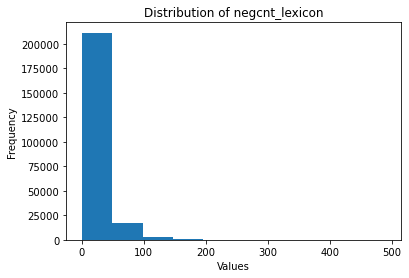

In [13]:
# plot a histogram of the column
plt.hist(data2['negcnt_lexicon'])

# set the title and axis labels
plt.title('Distribution of negcnt_lexicon')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show the plot
plt.show()

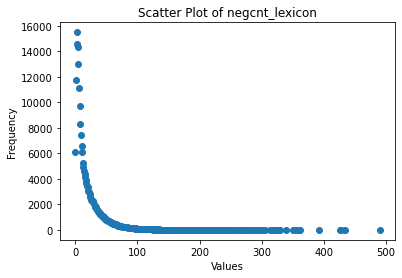

In [14]:
# get the unique values and their counts
unique_values, counts = np.unique(data2['negcnt_lexicon'], return_counts=True)

# plot the scatter plot
plt.scatter(unique_values, counts)

# set the title and axis labels
plt.title('Scatter Plot of negcnt_lexicon')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show the plot
plt.show()



In [15]:
#check if there are a lot of 0 in this column
count_zero = (data2['negcnt_lexicon'] == 0).sum()
print("Number of observations with 0 in negcnt_lexicon:", count_zero)
percentage_zero = (data2['negcnt_lexicon'] == 0).sum()/ len(data2['negcnt_lexicon'])
print("the proportion of the value 0 out of all the numbers of values:", percentage_zero)

Number of observations with 0 in negcnt_lexicon: 6083
the proportion of the value 0 out of all the numbers of values: 0.026211467032067358


In [16]:
#add a new column to identify text content as non-suicide or suicide
#0 represents non-suicide, and 1 represents suicide

for nrow in range(0,len(data2)):
    
    #if negcnt_lexicon is bigger than 10 , it means this text contains more negative words than median
    # thus, it will be identified as suicide('1')
    if data2['negcnt_lexicon'][nrow] >= 10: # I set the median (which is 10) as the boundary!!
        # if the text contains more than 10 words in the list, it will be classifed as suicide
        data2.loc[nrow, 'dict_label'] = 1
    else:
        data2.loc[nrow, 'dict_label'] = 0


In [24]:
data2['dict_label'] = data2['dict_label'].astype(int)

In [27]:
data2.head()

,text,class,negcnt_lexicon,dict_label
0,ex wife threatening suiciderecently i left my ...,1,29,1
1,am i weird i don't get affected by compliments...,0,10,1
2,finally 2020 is almost over... so i can never ...,0,9,0
3,i need helpjust help me im crying so hard,1,2,0
4,"i’m so losthello, my name is adam (16) and i’v...",1,74,1


In [28]:
#add a new column to identify the probability of an author committing suicide

for nrow in range(0,len(data2)):
    
    if data2['negcnt_lexicon'][nrow] < 10: # I set the median (which is 10) as the boundary!!
        data2.loc[nrow, 'suicide_prob'] = 0 
    elif data2['negcnt_lexicon'][nrow] >= 25: #quantile75
        data2.loc[nrow, 'suicide_prob'] = 100 
    else:
        data2.loc[nrow, 'suicide_prob'] = (data2['negcnt_lexicon'][nrow] / 25)*100

In [29]:
data2.head()

,text,class,negcnt_lexicon,dict_label,suicide_prob
0,ex wife threatening suiciderecently i left my ...,1,29,1,100.0
1,am i weird i don't get affected by compliments...,0,10,1,40.0
2,finally 2020 is almost over... so i can never ...,0,9,0,0.0
3,i need helpjust help me im crying so hard,1,2,0,0.0
4,"i’m so losthello, my name is adam (16) and i’v...",1,74,1,100.0


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate confusion matrix
cm_dict = confusion_matrix(data2["class"], data2['dict_label'])
# Calculate precision, recall, and f1-score
report_dict = classification_report(data2["class"], data2['dict_label'])
print("Confusion matrix:\n", cm_dict)
print("\nClassification report:\n", report_dict)

Confusion matrix:
 [[87481 28556]
 [24437 91600]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    116037
           1       0.76      0.79      0.78    116037

    accuracy                           0.77    232074
   macro avg       0.77      0.77      0.77    232074
weighted avg       0.77      0.77      0.77    232074



## Final model and evaluation

we pick three models from the traditional classification models we built by using different feature selection 

which are: NB on Bag of Words (BOW)- Binary, NB on Bag of Words (BOW)- Frequency, and RF on TF-IDF

And then we use Majority voting ensemble to improve the performance

In [82]:
# Get the indices of the testing data
test_indices = test_labels.index

# Select the corresponding rows from the original dataframe
test_data = data.loc[test_indices]

In [83]:
test_data

,text,class
11032,whi teacher whi will you give me a deadlin for...,0
35973,you dumbass me to futur me http youtu be jhkpa...,0
132746,i m too far gone to talk about my problem i th...,1
138298,selfish peopl who attempt commit suicid are of...,1
38005,lose touch with realiti think of check out bef...,1
...,...,...
103469,i m alreadi so tire i ve been depress and suic...,1
96278,i start count calori and i don t want to eat a...,0
220173,sorri for a late am rambl late i find it hard ...,1
23378,i need help with relationship hi so i m bisexu...,0


In [84]:
# create one new data frame that only contains the True label, LM_label, TB_label, and Vader_label
# Another data frame that only contains  LM_label, TB_label, and Vader_label(without true label)
test_data['mnb_bow_B_label'] = mnb_bow_B_predictions
test_data['mnb_bow_F_label'] = mnb_bow_F_predictions
test_data['rf_tfidf_label'] = rf_tfidf_predictions

test_data


,text,class,mnb_bow_B_label,mnb_bow_F_label,rf_tfidf_label
11032,whi teacher whi will you give me a deadlin for...,0,0,0,0
35973,you dumbass me to futur me http youtu be jhkpa...,0,0,0,0
132746,i m too far gone to talk about my problem i th...,1,1,1,1
138298,selfish peopl who attempt commit suicid are of...,1,1,1,1
38005,lose touch with realiti think of check out bef...,1,1,1,1
...,...,...,...,...,...
103469,i m alreadi so tire i ve been depress and suic...,1,1,1,1
96278,i start count calori and i don t want to eat a...,0,0,0,0
220173,sorri for a late am rambl late i find it hard ...,1,1,1,1
23378,i need help with relationship hi so i m bisexu...,0,0,0,0


In [86]:
test_data2 = test_data[['class','mnb_bow_B_label','mnb_bow_F_label','rf_tfidf_label']]

test_data2

,class,mnb_bow_B_label,mnb_bow_F_label,rf_tfidf_label
11032,0,0,0,0
35973,0,0,0,0
132746,1,1,1,1
138298,1,1,1,1
38005,1,1,1,1
...,...,...,...,...
103469,1,1,1,1
96278,0,0,0,0
220173,1,1,1,1
23378,0,0,0,0


In [88]:
import numpy as np
test_data3 = test_data[['mnb_bow_B_label','mnb_bow_F_label','rf_tfidf_label']]
test_data2['majority'] = test_data3.mode(axis = 1)[0]
test_data2['majority'] = test_data2['majority'].astype(np.int64)
test_data2

,class,mnb_bow_B_label,mnb_bow_F_label,rf_tfidf_label,majority
11032,0,0,0,0,0
35973,0,0,0,0,0
132746,1,1,1,1,1
138298,1,1,1,1,1
38005,1,1,1,1,1
...,...,...,...,...,...
103469,1,1,1,1,1
96278,0,0,0,0,0
220173,1,1,1,1,1
23378,0,0,0,0,0


In [89]:
test_data2[['class','majority']]

,class,majority
11032,0,0
35973,0,0
132746,1,1
138298,1,1
38005,1,1
...,...,...
103469,1,1
96278,0,0
220173,1,1
23378,0,0


In [90]:
# Calculate confusion matrix
cm_majority = confusion_matrix(test_data2['class'], test_data2['majority'])
# Calculate precision, recall, and f1-score
report_majority = classification_report(test_data2['class'], test_data2['majority'])
print("Confusion matrix:\n", cm_majority)
print("\nClassification report:\n", report_majority)

Confusion matrix:
 [[30476  4154]
 [ 1779 33214]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     34630
           1       0.89      0.95      0.92     34993

    accuracy                           0.91     69623
   macro avg       0.92      0.91      0.91     69623
weighted avg       0.92      0.91      0.91     69623

